# Examining Statistical Values of SPY, TLT, GLD, UUP, and VIX since January 1st, 2005

#### Julianna Dorsch

## Introduction

For many Americans that have retirement savings, their savings are in an IRA or a 401(k). Both IRAs and 401(k)s are accounts that are used to not only put away money for future use but are also used to grow money that is put away. (See [IRAs](https://www.investopedia.com/terms/i/ira.asp) and
[401ks](investopedia.com/terms/1/401kplan.asp)) The amount of money in the account increases because the money in these accounts is often in the form of stocks or bonds. Because of this setup, the money in these accounts will decrease if stocks crash.  In the 2008 financial crisis, these retirement accounts took a hit, and many Americans lost a good portion of their retirement savings. Therefore, if there is a statistical pattern that can be discovered that may indicate when stocks are going to take a hit, it would be advantageous to discover it, as then individuals would be able to transfer assets from these accounts into cash, meaning their assets will not decrease when the stock market goes down.  

It would next be helpful to explain some of the basics of the datasets that are being utilized. Exchange Traded Funds (ETF)s are securities that track a particular index. An index tracks a particular segment of the market. The ETFs that were utilized were SPY, TLT, GLD, and UUP. The SPY tracks the S&P500, which is an index tracking 500 of the largest companies, or stocks ([SPY](https://www.wsj.com/market-data/quotes/etf/SPY)). The TLT tracks U.S. 20 Year Treasury Bonds ([TLT](https://www.wsj.com/market-data/quotes/etf/TLT)). The GLD tracks the price of gold ([GLD](https://www.wsj.com/market-data/quotes/etf/GLD)). The UUP tracks the value of the U.S. dollar ([UUP](https://www.wsj.com/market-data/quotes/etf/UUP/historical-prices)). The VIX is an index that tracks the anticipated volatility of the market over the next 30 days ([VIX](https://www.wsj.com/market-data/quotes/index/VIX/historical-prices)). 

There are widely accepted relationships between the segments of the market that each of these track. Stocks, in this case the SPY, and gold, in this case GLD, are often seen to have an inverse relationship ([Stocks vs. Gold](https://finance.yahoo.com/news/gold-correlation-equity-markets-150729355.html#:~:text=While%20gold%20has%20an%20inverse,a%20severe%20stock%20market%20downturn.&text=Typically%2C%20stocks%20have%20a%20high,gold%20has%20an%20opposite%20relationship)). This is because when the stock, or equity market, is starting to lose value, investors see gold as being a stable place to invest their assets. Stocks and Treasury Bonds, in this case the TLT, are also seen to have an inverse relationship ([Stocks vs. Bonds](https://finance.zacks.com/correlation-treasuries-stocks-10871.html)). This is also due to the fact that investors see bonds as being a stable place to invest when the stock market goes down. In general, gold and bonds are seen as conservative investments, because investors will eventually see a yield on their investment most of the time. Conversely, stocks and the dollar are said to have a positive relationship because an increase in the price of stocks causes an increase in the demand for the dollar, which strengthens the value of the dollar ([Stocks vs. Dollar](https://www.investopedia.com/ask/answers/06/usdollarcorrelation.asp#:~:text=The%20Bottom%20Line,this%20relationship%20is%20foreign%20investment)). Lastly, stocks and the VIX have had a more complicated history. Typically, stocks and the VIX have an inverse relationship, because as stocks fall, investors become more nervous, making the VIX go up ([Stocks vs. VIX](https://www.aol.com/news/stocks-behave-p-500-vix-120002142.html#:~:text=The%20CBOE%20Market%20Volatility%20Index,the%20VIX%20tends%20to%20rise)). However, recently, when taking the 10-day correlation for the daily change between these two indexes, they sometimes become positively correlated.  

The relationships described above are the generally accepted rules of the stock market. However, one should note the stock market is very complicated and will not always follow these rules. 

## Questions

From the above discussion, it would be reasonable to assume that before a crash, the values of particular ETFs might be higher or lower on average when compared to how the ETF had been performing in recent days.  A natural and simple statistic to see how much a particular point is above or below the average is the z-score.  For example, one might expect that because the SPY is increasing or constant before a crash, the z-score in the days leading up to a crash will be positive.  Additionally, it would also be reasonable to assume that the relationship and the strength of the relationship between the ETFs and the VIX will change in the days leading up to a crash.  For example, from the trends discussed above, one might expect that before a crash, the SPY and VIX to have a more negative relationship because as the stocks rise in the weeks leading up to a crash, investors will be less nervous, meaning the VIX will be lower. This led me to want to address the following questions:

* What was the average z-score for the SPY, TLT, GLD, and UUP for the 10 days leading up to the beginning of each crash?
* What was the average SPY to VIX correlation for the 10 days leading up to the beginning of each crash?
* What was the average SPY to GLD correlation for the 10 days leading up to the beginning of each crash?
* What was the average SPY to TLT correlation for the 10 days leading up to the beginning of each crash?
* What was the average SPY to UUP correlation for the 10 days leading up to the beginning of each crash?

More explanation of why these statistics were chosen will be provided later.

Some trends that I expected to see were that the z-scores for the SPY and the UUP would be positive, that the SPY/VIX correlation will be more negative on average, and that the SPY/UUP correlation will be more positive than on average.  These are due to the general trends discussed above.  Since the TLT and GLD have an inverse relationship with the SPY, I would expect the z-scores to be negative. 

## Dataset

The data for the dataset was obtained from the Wall Street Journal at the following websites: [SPY](https://www.wsj.com/market-data/quotes/etf/SPY/historical-prices), [GLD](https://www.wsj.com/market-data/quotes/etf/GLD/historical-prices), 
[TLT](https://www.wsj.com/market-data/quotes/etf/TLT/historical-prices), [UUP](https://www.wsj.com/market-data/quotes/etf/UUP/historical-prices), [VIX](https://www.wsj.com/market-data/quotes/index/VIX/historical-prices). A way to get a CSV file that had the opening, closing, high, and low prices as well as the volume, or how many trades of that ETF were conducted for each day was utilized. Only the closing price was used, resulting in a dataset containing columns for the 4 ETFs and the VIX. It should be noted that the UUP did not come into inception until 2007, so for the dates before 2007, that column has no values. The following is the code utilized to obtain the dataset.

In [1]:
#These are required libraries
from datetime import date
import requests
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statistics import fmean, stdev

In [14]:
#The following functions obtain the raw data from the Wall Street Jounral
#The get process was used with headers to be respectful of WSJ
def subdomain(typ, symbol, length):
    today = '04/06/21'
    subdoma="{0}{1}/historical-prices/download?num_rows={2}&range_days={2}&endDate={3}"
    subdomain = subdoma.format(typ, symbol, length, today)
    return subdomain
def header_function(subdomain):
    hdrs = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64)"}
    return hdrs
def scrape_page(url, header):
    page = requests.get(url, headers=header)
    return page.text
def format_page(symbol, typ, length):
    base_url = 'https://www.wsj.com/market-data/quotes/'
    sub = subdomain(typ, symbol, length)
    header = header_function(sub)
    url = base_url + sub
    price_history = scrape_page(url, header)
    history = [[i[0:8]] + [float(j) for j in i.split(",")[1:]] for i in price_history.split("\n")[1:]]
    history = history[::-1]
    return history

In [15]:
#The following formats the raw data into a pandas dataframe for each index
def formatHistory(data, symbol):
    hist = pd.DataFrame(data)
    hist = hist.rename(columns={0: "Date"})
    hist["Date"] = pd.to_datetime(hist["Date"], format='%m/%d/%y')
    hist = hist.set_index('Date')
    hist = hist.drop(columns = [1, 2, 3])
    if(symbol != 'VIX'):
        hist = hist.drop(columns = [5])
    hist = hist.rename(columns={4: symbol})
    return hist

In [16]:
#The following creates one dataframe that has all of the desired indexes
#The VIX was adjusted so that it only had values on days the stock market
#was open or closed, as the VIX is recorded every day while the ETFs
#are only recorded when the stock market is open.
def getStocks(numDays):
    dat1 = format_page('SPY', 'etf/', numDays)
    SPY = formatHistory(dat1, 'SPY')
    sleep(3)
    dat2 = format_page('VIX', 'index/', numDays)
    VIX = formatHistory(dat2, 'VIX')
    sleep(3)
    dat3 = format_page('TLT', 'etf/', numDays)
    TLT = formatHistory(dat3, 'TLT')
    sleep(3)
    dat4 = format_page('GLD', 'etf/', numDays)
    GLD = formatHistory(dat4, 'GLD')
    sleep(3)
    dat5 = format_page('UUP', 'etf/', numDays)
    UUP = formatHistory(dat5, 'UUP')
    VIX = VIX.loc[SPY.index]
    stocks = pd.concat([SPY, VIX, TLT, GLD, UUP], axis = 1)
    stocks = stocks.reset_index()
    return stocks

In [17]:
#5939 is the days since Jan 1, 2005. 
#This is how the get request is formatted to get the values
stocks = getStocks(5939)

In [18]:
#The following cell places each index into its own dataframe
#This will be useful for some of the functions used later
#due to the lack of UUP data from 2005 to 2007.
dat1 = format_page('SPY', 'etf/', '5939')
SPY = formatHistory(dat1, 'SPY')
sleep(3)
dat2 = format_page('VIX', 'index/', '5939')
VIX = formatHistory(dat2, 'VIX')
VIX = VIX.loc[SPY.index]
SPY = SPY.reset_index()
VIX = VIX.reset_index()
sleep(3)
dat3 = format_page('TLT', 'etf/', '5939')
TLT = formatHistory(dat3, 'TLT')
TLT = TLT.reset_index()
sleep(3)
dat4 = format_page('GLD', 'etf/', '5939')
GLD = formatHistory(dat4, 'GLD')
GLD = GLD.reset_index()
sleep(3)
dat5 = format_page('UUP', 'etf/', '5939')
UUP = formatHistory(dat5, 'UUP')
UUP = UUP.reset_index()

To get an overall feel for the data, we will first plot the ETFs and the VIX on the same chart.

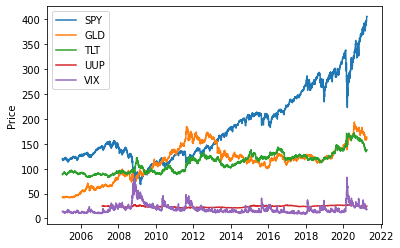

In [22]:
plt.plot(stocks['Date'], stocks['SPY'], label = 'SPY')
plt.plot(stocks['Date'], stocks['GLD'], label = 'GLD')
plt.plot(stocks['Date'], stocks['TLT'], label = 'TLT')
plt.plot(stocks['Date'], stocks['UUP'], label = 'UUP')
plt.plot(stocks['Date'], stocks['VIX'], label = 'VIX')
plt.ylabel('Price')
plt.legend()
plt.show()

Some things that can immediately be observed is that during big crashes of the S&P500 such as in 2007-2009 and in March of 2020, one can observe that there was a sharp increase in the VIX. This does match the previous assumption that the S&P500 and VIX have an inverse relationship. Also, in general, it seems that the TLT and GLD follow each other, with respect that they tend to have increases and decreases during the same general time frame. One should note that these observations are based purely on the above visauliization and not on a statistical test. The purpose of this visualization was to establish that in general, the rules discussed above are applicable most of the time, but vigorous statistical methods are needed.  The purpose of this overall discussion is to establish if there are statistical patterns that occur before a crash.

## Detecting Crashes

For our purposes, a crash will be defined as a decrease in the value of the stock market of at least 10% over a period of time.  The source used to identify when these crashes started and stopped since 2005 is [Crashes](https://awealthofcommonsense.com/2021/02/a-short-history-of-u-s-stock-market-corrections-bear-markets/). The following is a hard-coded 2D array with the first element being the index of the stocks dataframe when the crash started, and the second being the index of when the crash stopped. There were 7 crashes.

In [23]:
crashes = [[696, 1051], [1335, 1384], [1592, 1700], [2728, 2796], [3289, 3298], [3453, 3518], [3807, 3830]]

## Z-Score Analysis

Before a stock market crash, it would be safe to assume that the price of the SPY was higher in comparison to previous days and experiencing an upward trend. A simple way of evaluating if a particular price point is higher or lower than the average of the previous days is the z-score. The z-score can be calculated by taking the price values for the previous, say 80 days, and then calculating the z-score for the current day, given the previous 80 days' mean and standard deviation. A z-score of 1 means the price of the current day is 1 standard deviation above the mean, while -2 means 2 standard deviations below the mean. The z-scores are typically within the range of -3 to 3. Z-scores can be used due to the Central Limit Theorem, which says that for a sample "large enough", usually $n = 30$, the distribution of the sample mean will approach a normal distribution. For our purposes, we can calculate the z-score of each day for the entire history, using a window of 80 days to look back on.  One would expect the SPY to have a higher z-score in the weeks leading up to a crash than previous weeks.  The following are functions that helped set up my z-score analysis:

In [28]:
#Gets the previous 80 days of ETF given day number
def getWindow(ETF, day, N = 80):
    ''' Default of N is 80
    indexing of days starts at 0,
    but for 81st day, put 81 as day 
    '''
    indAdj = N + 1
    close = ETF[day - indAdj:day - 1]
    newClose = ETF[day - 1]
    return [close, newClose]
#Calculates z-score using sample mean and sample standard deviation
def zScore(ETF, day, N = 80):
    ''' Default of N is 80
    indexing of days starts at 0,
    but for 81st day, put 81 as day 
    '''
    close, newClose = getWindow(ETF, day, N)
    mean = fmean(close)
    sd = stdev(close)
    z = (newClose - mean) / sd
    return z
#Returns z-scores for each of the previous 10 days, given a day and ETF
def rangeZScores(ETF, end):
    scores = []
    for i in range(end + 1 - 10, end + 1):
        z = zScore(ETF, i)
        scores = scores + [z]
    return scores 
#The following plots the z-scores for the 10 days leading up to each crash for a particular ETF
def plotZ(crash, stock, symbol):
    ends = [i[0] for i in crashes]
    fig, ax = plt.subplots(figsize = (6.4, 4.8))
    j = 1
    for i in ends:
        til = 'Crash' + str(j)
        plt.plot(rangeZScores(stock, i), label = til)
        j = j + 1
    tit = 'Z-scores for ' + symbol
    plt.title(tit)
    plt.ylabel(tit)
    plt.legend()
    plt.xlabel('Days Before Each Crash, 0 is 10 days before start of crash')
    plt.show()

Let us now plot the z-scores for the 10 days leading up to the start of each crash for each ETF.

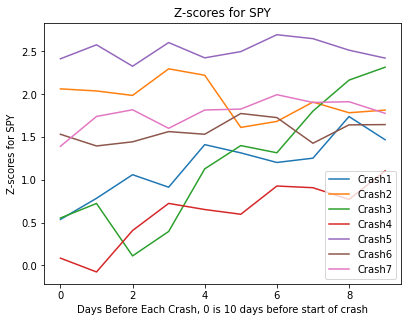

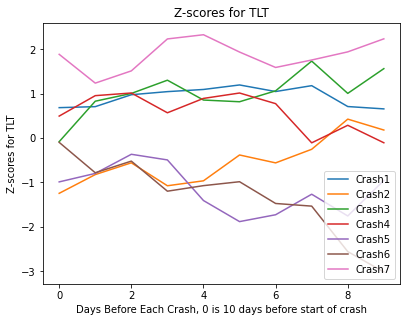

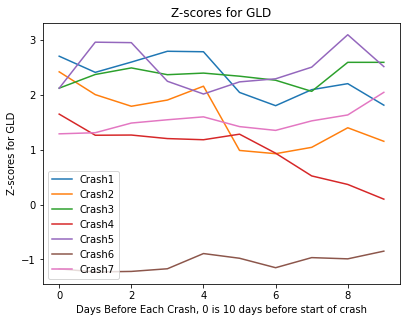

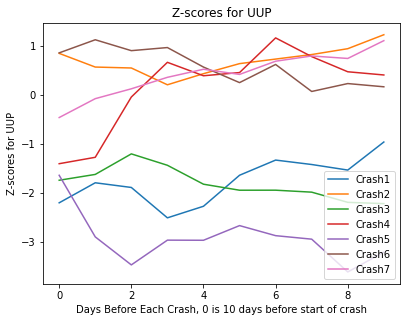

In [29]:
plotZ(crashes, stocks['SPY'], 'SPY')
plotZ(crashes, stocks['TLT'], 'TLT')
plotZ(crashes, stocks['GLD'], 'GLD')
plotZ(crashes, stocks['UUP'], 'UUP')

As can be seen above, the z-scores for the ETFs in the days leading up to a crash do tend to fall within a certain range, and do not take up the entire possible range of -3 to 3.  We will now like to see if the average value of the z-score for each of these ETFs in the days leading up to a crash has a statistically significant difference with the average value of the z-score of the other days of the history of the ETF.  For the entire history, we will exclude the days of the crash and the first 80 days. The first 80 days are excluded because we wish for the calculation of the z-score to be consistent. Because the z-scores for the days before a crash are not normally distributed, the Mann Whitney U test will be utilized. The following functions will help with the analysis:

In [30]:
#Getting z-scores for all 7 crashes, results in a list of length 70
def getAllZ(stock, crash):
    ends = [i[0] for i in crash]
    allZ = []
    for i in ends:
        allZ = allZ + rangeZScores(stock, i) 
    return allZ
#Print the p_value for the mannwhitneyu test and a boxplot comparing the two sets of z-scores
def zScoreSummary(stocks, allStocks, crash, symbol):
    crashZ = getAllZ(stocks, crash)
    dates = list(range(81, 697)) + list(range(1051, 1336)) + list(range(1384, 1593)) + list(range(1700, 2729)) + list(range(2796, 3290)) + list(range(3298, 3454)) + list(range(3518, 3808)) + list(range(3830, len(allStocks) + 1))
    if(symbol == 'UUP'):
        dates = list(range(81, 161)) + list(range(515, 800)) + list(range(848, 1057)) + list(range(1164, 2193)) + list(range(2260, 2754)) + list(range(2762, 2918)) + list(range(2982, 3272)) + list(range(3294, len(allStocks) + 1))    
    allZ = [zScore(allStocks, i) for i in dates]
    test_statistic, p_value = stats.mannwhitneyu(crashZ, allZ)
    print(symbol)
    print()
    print("p-value is: ", p_value)
    print()
    print('5 number summary for Z-scores before Crashes for ', symbol)
    print("Min: ", np.min(crashZ))
    print("Max: ", np.max(crashZ))
    print("STD: ", np.std(crashZ))
    print("Mean: ", np.mean(crashZ))
    print("Median: ", np.median(crashZ))
    print()
    print('5 number summary for Z-scores for all of ', symbol)
    print("Min: ", np.min(allZ))
    print("Max: ", np.max(allZ))
    print("STD: ", np.std(allZ))
    print("Mean: ", np.mean(allZ))
    print("Median: ", np.median(allZ))
    data = list([crashZ, allZ])
    fig, ax = plt.subplots()
    ax.boxplot(data)
    ax.set_title('Z-scores for before crashes vs. All of ' + symbol)
    ax.set_ylabel('z-score')
    xticklabels=['Before Crashes', 'All of ' + symbol ]
    ax.set_xticklabels(xticklabels)
    ax.yaxis.grid(True)
    plt.show()

Performing statistical test and making boxplots for each ETF

SPY

p-value is:  3.587825071391765e-07

5 number summary for Z-scores before Crashes for  SPY
Min:  -0.0758600859189296
Max:  2.695107097194121
STD:  0.6689566089701149
Mean:  1.5386946149345981
Median:  1.6272522803524294

5 number summary for Z-scores for all of  SPY
Min:  -8.10755276924955
Max:  3.1245093085220876
STD:  1.1444622896269105
Mean:  0.8793546773311038
Median:  1.1983345550724536


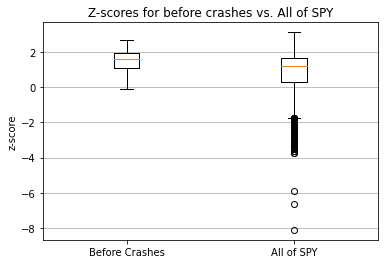

TLT

p-value is:  0.16036656574997576

5 number summary for Z-scores before Crashes for  TLT
Min:  -3.0147231399413665
Max:  2.3259163394143934
STD:  1.2286753118222593
Mean:  0.19573299184094392
Median:  0.5314249427312342

5 number summary for Z-scores for all of  TLT
Min:  -3.8494951007304494
Max:  3.810499354722611
STD:  1.393473005972339
Mean:  0.05210801415277623
Median:  0.09997038411864173


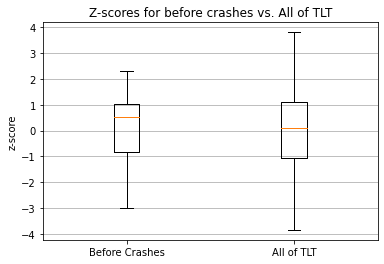

GLD

p-value is:  3.2402508410893307e-13

5 number summary for Z-scores before Crashes for  GLD
Min:  -1.2283088102759239
Max:  3.0963466555796524
STD:  1.1998486054841364
Mean:  1.4566001078999884
Median:  1.7976476864490918

5 number summary for Z-scores for all of  GLD
Min:  -5.915903918246261
Max:  4.645607447614594
STD:  1.4154592171080285
Mean:  0.25443262596647903
Median:  0.29817587220512975


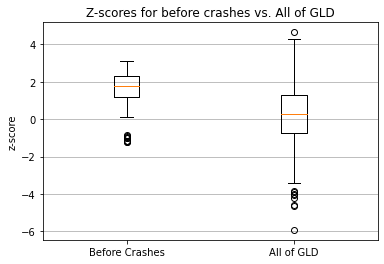

UUP

p-value is:  0.0018808594368386823

5 number summary for Z-scores before Crashes for  UUP
Min:  -3.6080535357300296
Max:  1.2199359814084436
STD:  1.4335696722142586
Mean:  -0.6650507328002832
Median:  0.008798205924946276

5 number summary for Z-scores for all of  UUP
Min:  -4.282038023967383
Max:  3.953516911803921
STD:  1.4143286986080497
Mean:  -0.08044166505191523
Median:  -0.21221104516256584


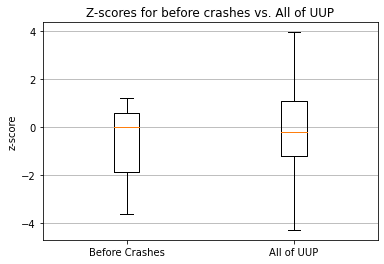

In [31]:
zScoreSummary(stocks['SPY'], stocks['SPY'], crashes, 'SPY')
zScoreSummary(stocks['TLT'], stocks['TLT'], crashes, 'TLT')
zScoreSummary(stocks['GLD'], stocks['GLD'], crashes, 'GLD')
zScoreSummary(stocks['UUP'], UUP['UUP'], crashes, 'UUP')

If the p-value is less than 0.05, it can be concluded that there is a statistically significant difference between the sets. If the value is greater, this cannot be concluded, and there is a failure to reject the null hypothesis that the averages are the same. All of the ETFs had a p-value less than 0.05 except for TLT. For SPY, the average z-score value before a crash was about 1.5, while for the rest of the time it was 0.8.  For GLD, before a crash the average z-score value was about 1.5, while for the rest of the time it was about 0.25. For the UUP, the average z-score value before a crash was -0.67, while for the rest of the time it was -0.08.  These statistics would suggest that for SPY and GLD, before a crash, the average z-score is going to be higher than on average, and for the UUP, it will be lower. In more contextualized terms, this means that the price level of SPY and GLD in the days to be leading up to a crash tend to be higher than the average price of the preceding days, or that SPY and GLD are experiencing an upward trend. For the UUP, it means that the price level in the days leading up to a crash tend to be lower than the average price of the preceding days, or that the UUP is experiencing a downward trend.  The results of the SPY z-score match my early suspicions, but the UUP and GLD performed opposite of what I was expecting, given the general trends of the stock market.  Perhaps the GLD was also experiencing an upward trend was because investors see that there is an upward trend in the SPY, and anticipating a crash in the SPY, move their assets into gold, which is more stable.  The reverse could also apply for the UUP.  Foreign investors see that the SPY is performing quite strongly, and in anticipation of a crash, move their assets out of the dollar and into a foreign currency, meaning the dollar decreases in value.  The lack of change in the TLT could suggest that the TLT is a very stable security and is not highly sensitive to fluctuations in the market.

Some cautionary statements with the analysis above include that stock prices are often cyclical based on seasons and holidays.  This analysis ignores the variance contributed by these cycles.  Also, it does not take into account if there are other periods of time during the history of the ETFs that experience the same average z-scores over a 10 day period, but a crash does not occur.  Additionally, these results could be different if intervals other than 10 and 80 are used.  More investigation into the trends seen in the GLD and UUP should be conducted.  Further analysis with regard to these issues would need to be conducted.

## Correlation Analysis

As discussed in the introduction, there is often a relationship between these ETFs and the VIX. A common way to evaluate the strength of a relationship is by using the correlation.  For example, if the SPY was about to crash, one could expect that the UUP would be increasing because the SPY was increasing in the days leading up to the crash.  Therefore, one might expect that the correlation between these daily changes of these two sets might be higher when compared to  another time.  The same process for calculating the z-scores was used with the correlations, except that a look-back window of 126 days was used.  The 10 days before the SPY crash were still examined.  The following functions helped set up the correlation analysis:

In [32]:
#Gets previous 127 days, as because since daily change is used, need extra day
def getWindow2(ETF, day, N = 127):
    ''' Default of N is 81
    indexing of days starts at 0,
    but for 81st day, put 81 as day 
    '''
    close = ETF[day - N + 1:day + 1]
    return close
#Returns correlation coefficient of the daily change between 2 stocks/indexes
def correlation(ETF1, ETF2, day, N = 126):
    fund1 = list(getWindow2(ETF1, day, N + 1))
    fund2 = list(getWindow2(ETF2, day, N + 1))
    xChanges = []
    yChanges = []
    for i in range(len(fund1) - 1):
        xdiff = (fund1[i + 1] - fund1[i])/fund1[i]
        ydiff = (fund2[i + 1] - fund2[i])/fund2[i]
        xChanges = xChanges + [xdiff]
        yChanges = yChanges + [ydiff]
    r = stats.pearsonr(xChanges, yChanges)
    return r[0]
#Returns correlations for each of previous 10 days, given 2 sets and a day
def rangeCorr(ETF1, ETF2, end):
    scores = []
    for i in range(end + 1 - 10, end + 1):
        c = correlation(ETF1, ETF2, i)
        scores = scores + [c]
    return scores 
#Plots correlations for 10 days leading up to each crash for a particular relationship
def plotCorr(crash, stock1, stock2, symbol1, symbol2):
    ends = [i[0] for i in crashes]
    fig, ax = plt.subplots(figsize = (6.4, 4.8))
    j = 1
    for i in ends:
        til = 'Crash' + str(j)
        plt.plot(rangeCorr(stock1, stock2, i), label = til)
        j = j + 1
    tit = 'Correlations for ' + symbol1 + "/" + symbol2
    plt.ylabel(tit)
    plt.title(tit)
    plt.legend()
    plt.xlabel('Days Before Each Crash, 0 is 10 days before start of crash')
    plt.show()

Plotting the correlations for the 10 days leading up to each crash.

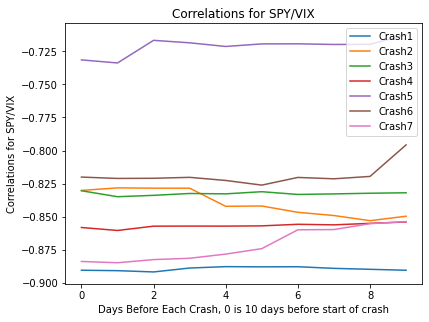

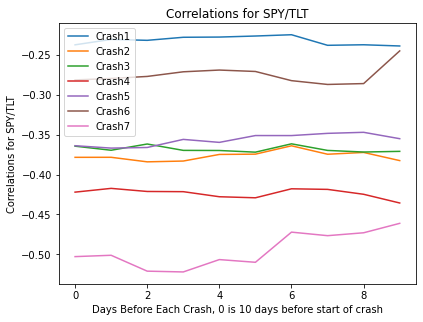

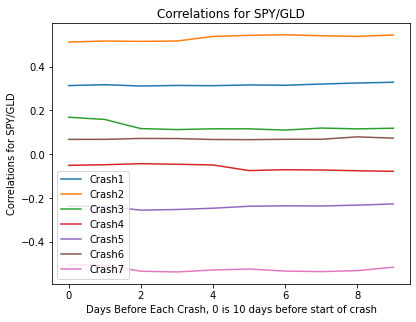

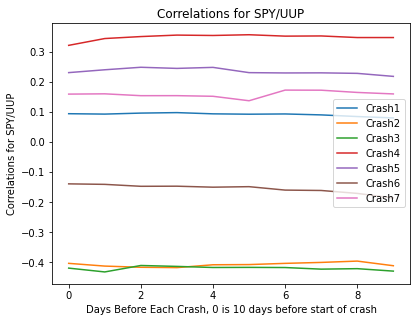

In [33]:
plotCorr(crashes, stocks['SPY'], stocks['VIX'], 'SPY', 'VIX')
plotCorr(crashes, stocks['SPY'], stocks['TLT'], 'SPY', 'TLT')
plotCorr(crashes, stocks['SPY'], stocks['GLD'], 'SPY', 'GLD')
plotCorr(crashes, stocks['SPY'], stocks['UUP'], 'SPY', 'UUP')

As can be seen above, the correlations for the ETFs in the days leading up to a crash do tend to fall within a certain range, but the range seems to be rather large.  We will now like to see if the average value of the correlation for each of these ETFs in the days leading up to a crash has a statistically significant difference with the average value of the correlation of other days of the history of the ETF.  The history of the ETF will exclude the days of the crash and the first 126 days. The first 126 days are excluded because we wish for the calculation of the correlation to be consistent. Because the correlations for the days before a crash are not normally distributed, the Mann Whitney U test will be utilized. The following functions will help with the analysis:

In [35]:
#Getting correlations for all 7 crashes, results in a list of length 70
def getAllCor(stock1, stock2, crash):
    ends = [i[0] for i in crash]
    allC = []
    for i in ends:
        allC = allC + rangeCorr(stock1, stock2, i) 
    return allC
#Print the p-value of the mannwhitneyu test and boxplot comapring the sets of correlations
def corScoreSummary(stocks1, stocks2, allStocks1, allStocks2, crash, symbol1, symbol2):
    crashC = getAllCor(stocks1, stocks2, crash)
    dates = list(range(127, 697)) + list(range(1051, 1336)) + list(range(1384, 1593)) + list(range(1700, 2729)) + list(range(2796, 3290)) + list(range(3298, 3454)) + list(range(3518, 3808)) + list(range(3830, len(allStocks2) + 1))
    if(symbol2 == 'UUP'):
        dates = list(range(127, 161)) + list(range(515, 800)) + list(range(848, 1057)) + list(range(1164, 2193)) + list(range(2260, 2754)) + list(range(2762, 2918)) + list(range(2982, 3272)) + list(range(3294, len(allStocks2) + 1))    
    allC = [correlation(allStocks1, allStocks2, i) for i in dates]
    test_statistic, p_value = stats.mannwhitneyu(crashC, allC)
    print(symbol1, "/", symbol2)
    print()
    print("p-value is: ", p_value)
    print()
    print('5 number summary for Correlations before Crashes for ', symbol1, "/", symbol2)
    print("Min: ", np.min(crashC))
    print("Max: ", np.max(crashC))
    print("STD: ", np.std(crashC))
    print("Mean: ", np.mean(crashC))
    print("Median: ", np.median(crashC))
    print()
    print('5 number summary for Correlation for all of ', symbol1, "/", symbol2)
    print("Min: ", np.min(allC))
    print("Max: ", np.max(allC))
    print("STD: ", np.std(allC))
    print("Mean: ", np.mean(allC))
    print("Median: ", np.median(allC))
    data = list([crashC, allC])
    fig, ax = plt.subplots()
    ax.boxplot(data)
    ax.set_title('Correlation for before crashes vs. All of ' + symbol1 + "/" +  symbol2)
    ax.set_ylabel('Correlation')
    xticklabels=['Before Crashes', 'All of ' + symbol1 + "/" +  symbol2 ]
    ax.set_xticklabels(xticklabels)
    ax.yaxis.grid(True)
    plt.show()

Performing statistical test and making boxplots for each relationship:

SPY / VIX

p-value is:  0.0008278950302294081

5 number summary for Correlations before Crashes for  SPY / VIX
Min:  -0.8918180957179487
Max:  -0.7124590784241455
STD:  0.0511463592041265
Mean:  -0.8328966721640393
Median:  -0.8420761509433055

5 number summary for Correlation for all of  SPY / VIX
Min:  -0.9196508390950618
Max:  -0.533146817855602
STD:  0.061925679381718224
Mean:  -0.8120063217697442
Median:  -0.8260773449172225


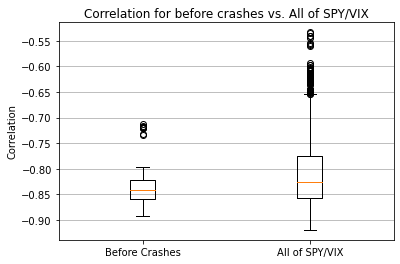

SPY / TLT

p-value is:  0.4768327859652419

5 number summary for Correlations before Crashes for  SPY / TLT
Min:  -0.5222627287917245
Max:  -0.22456722008108848
STD:  0.08191535253369989
Mean:  -0.3609220172227876
Median:  -0.3696242039785762

5 number summary for Correlation for all of  SPY / TLT
Min:  -0.8000634845978976
Max:  0.17257095731788974
STD:  0.223315804548355
Mean:  -0.3522509018729437
Median:  -0.36173767434555726


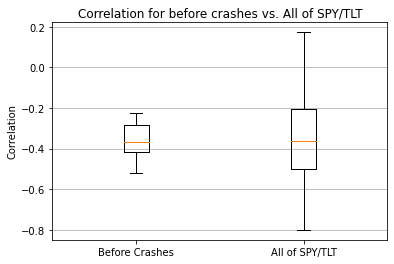

SPY / GLD

p-value is:  0.4900099844100169

5 number summary for Correlations before Crashes for  SPY / GLD
Min:  -0.535775495656896
Max:  0.5449838975621875
STD:  0.3232739073276889
Mean:  0.031686838872998856
Median:  0.0686185330156206

5 number summary for Correlation for all of  SPY / GLD
Min:  -0.535775495656896
Max:  0.5471792284509519
STD:  0.23426315584061694
Mean:  0.03690135341227769
Median:  0.035255237376238216


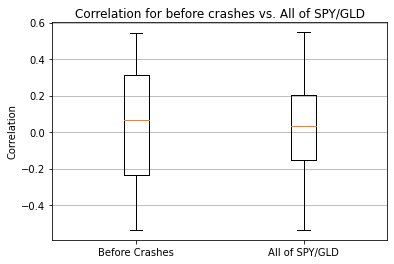

SPY / UUP

p-value is:  8.307726807319179e-06

5 number summary for Correlations before Crashes for  SPY / UUP
Min:  -0.43136957437395607
Max:  0.35598493637021367
STD:  0.2858656593900439
Mean:  -0.021428230503393205
Median:  0.09278962725697719

5 number summary for Correlation for all of  SPY / UUP
Min:  -0.7932450573375902
Max:  0.48879837869433124
STD:  0.2953375821744219
Mean:  -0.16010842204709552
Median:  -0.11683161063722833


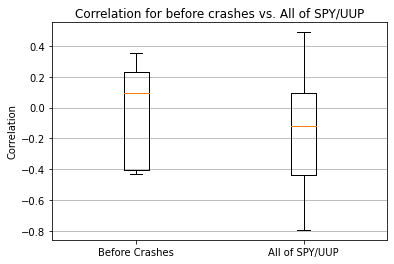

In [36]:
corScoreSummary(stocks['SPY'], stocks['VIX'], stocks['SPY'], stocks['VIX'], crashes, 'SPY', 'VIX')
corScoreSummary(stocks['SPY'], stocks['TLT'], stocks['SPY'], stocks['TLT'], crashes, 'SPY', 'TLT')
corScoreSummary(stocks['SPY'], stocks['GLD'], stocks['SPY'], stocks['GLD'], crashes, 'SPY', 'GLD')
corScoreSummary(stocks['SPY'], stocks['UUP'], stocks['SPY'][536:], UUP['UUP'], crashes, 'SPY', 'UUP')

If the p-value is less than 0.05, it can be concluded that there is a statistically significant difference between the sets. If the value is greater, this cannot be concluded, and there is a failure to reject the null hypothesis that the averages are the same. The only relationships that had a p-value of less than 0.05 were SPY/VIX and SPY/UUP. For SPY/VIX, the average correlation value before a crash was -0.83, while for the rest of the time it was -0.81.  This is not a large difference numerically, but the test stated it was statistically signifciant.  For SPY/UUP, before a crash the average correlation value was about -0.02, while for the rest of the time it was about -0.16.  These statistics would suggest that for SPY/VIX, before a crash, the average correlation is going to be slightly more negative than on average, while for SPY/UUP, it will be slighlty more positive than on average.  In more contextualized terms, this means that the price level of SPY and the VIX are moving more inversely prior to a crash compared to other times.  For the SPY/UUP, it means that the price level of SPY and the value of the dollar are more positively correlated in the days leading up to a crash, but still negative.  The result regarding a more negative SPY/VIX correlation was the expected result, as the increasing SPY would cause a decreasing VIX, meaning a more negative correlation.  The result regarding the SPY/UUP was also the expected result, as before a crash it was more positive than on average.  However, the correlation is still negative, which corresponds to results from the z-score analysis.

The same cautionary statement about the cyclical nature of the stock market also applies here, as well as this does not take into account if there are other periods of time during the history of the ETFs that experience the same average correlation over a 10 day period, but a crash does not occur afterwards.  Additioanlly, the correlation values are highly dependent on the look-back window length, so further analysis with different time intervals need to be conducted.   Also, while there was a statistically signifcant difference for the SPY/VIX correlation in the comparison of pre-crash values versus the rest of the time, the difference between the means was still small.

## Conclusions and Discussions

The statistical analysis showed that before a crash, the average z-score of the 10 days leading up to a crash was higher for the SPY and GLD, while it was lower for the UUP.  No statistical conclusions could be drawn about the TLT.  Additionally, it showed that the average correlation before a crash of the SPY/VIX was more negative than on average, while the SPY/UUP was more positive, but still negative, than on average.  No statistical conclusions could be drawn about SPY/TLT and SPY/GLD.  In general, the lack of statistically significant differences for the statistics involving the TLT would suggest that the TLT is not very reactionary, but more investigation of this idea is needed.  Additionally, one could think that because both the TLT and GLD tend to have an inverse relationship with the SPY, and there were different statistical results regarding the z-scores of these two ETFs, this could suggest that investors view GLD and TLT differently.  This would also need further investigation.  The average value of the z-scores and the correlations for the 10 days leading up to each crash were found, and in the future could be utilized to see if there are other 10 day intervals during the history that have the same averages.  If this is the case, and a decrease in the stock market happens afterwards, than this would suggest that these statistics are helpful in predicting a downturn of the market.  If these instances are followed by a level period or an increase, it would suggest that a different statistical method would also be needed.  Additionally, 10 day periods that have higher z-scores for SPY and GLD, lower z-scores for UUP, more negative SPY/VIX correlation, and less negative SPY/UUP correlation than the average could be found, and examined to see if these periods are followed by a decrease, increase, or level period of the SPY. It should also be noted that if these periods do proceed an increase, they could still proceed a decline in the SPY more often than they proceed an increase.  If this was the case, then they could still be considered effective.  Future studies should take into account the cyclical nature of the market that was discussed earlier.  Methods that also incorporate the trading volume for the ETF per day could help in assessing what investors are feeling about particular ETFs at a given time.  Also, the above processes should be repeated but with different time intervals for the amount of days before a crash and the length of the look-back window.

## Ethics

If the indicators that were discovered in this study do turn out to be a realtively good indicator of market declines, it would have ethical ramifications.  Groups who would be able to take advantage of this information would be individuals who personally monitor and move their assets in their own retirement accounts. Similarly, this could also be used by small investment firms to protect the assets of their clients. However, if enough small investment firms or individuals start following this pattern, larger hedge funds or banks who have large buying power in the stock market could start legally manipulating stock prices to hurt smaller investors and benefit themselves when it seems that a crash is about to occur.  If large hedge funds and banks are sucessfully able to legally manipulate stock prices to benefit them and hurt smaller investors, it would mean that smaller investors would have less assets. As many citizens of the country can be considered small investors, this means that citiznes would have less money to spend, which could potentially lead to a recession caused by a decrease in consumer spending.  It could also discourage small investors from investing, which would lead to a decrease in investment, which could also lead to an economic contraction.